In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import os
import cv2
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, roc_auc_score
from sklearn.model_selection import KFold, GridSearchCV

In [4]:
# import pickle
# with open('/content/drive/MyDrive/Colab Notebooks/SVM_Model.pkl', 'rb') as f:
#     clf = pickle.load(f)

In [5]:
train_path="final_symbols_with_split/train"
test_path="final_symbols_with_split/test"
 
def create_dataset(path):
    data = []
    label_name = {'add': 10, 'divide': 1, 'eight': 8, 'five': 5, 'four': 4,
                  'multiply': 11, 'nine': 9, 'one': 1, 'seven': 7, 'six': 6,
                  'subtract': 12, 'three': 3, 'two': 2, 'zero': 13}

    for subfolder in os.listdir(path):
        # print(subfolder)
        for filename in os.listdir(path + '/' + subfolder):

            listy = []
            #print(os.path.join(path + '/' + subfolder, filename))
            
            img = cv2.imread(os.path.join(path + '/' + subfolder, filename), 0)
            img_arr = cv2.resize(img,(28,28))
            listy.append(label_name[subfolder])
            listy.extend(img_arr.flatten().astype(int))
            data.append(listy)
                                      
    df = pd.DataFrame(data)
    return df

# find . -name '*.DS_Store' -type f -delete

In [6]:
train  = create_dataset(train_path)

In [7]:
test = create_dataset(test_path)

In [8]:
#Train X_tr
X_tr = train.iloc[:,1:] # iloc ensures X_tr will be a dataframe
X_tr =  X_tr/255.0
y_tr = train.iloc[:, 0]

#Test X_tt
X_tt = test.iloc[:,1:] # iloc ensures X_tr will be a dataframe
X_tt = X_tt/255.0
y_tt = test.iloc[:,0]

In [11]:
# creating a KFold object with 5 splits 
from sklearn.model_selection import GridSearchCV, KFold


folds = KFold(n_splits = 5, shuffle = True)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {  'penalty' : ['l2'],
                     'C': [0.001,0.01,0.1,1,10,100,1000]
}]


# specify model
model_try = LogisticRegression(solver='lbfgs', multi_class='multinomial',max_iter=10000)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model_try, 
                        param_grid = hyper_params, 
                        scoring= 'f1_weighted',
                        cv = folds, 
                        verbose = 2,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_tr, y_tr)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ................................C=0.001, penalty=l2; total time= 1.4min
[CV] END ................................C=0.001, penalty=l2; total time= 1.7min
[CV] END ................................C=0.001, penalty=l2; total time=  41.4s
[CV] END ................................C=0.001, penalty=l2; total time= 1.3min
[CV] END ................................C=0.001, penalty=l2; total time= 1.3min
[CV] END .................................C=0.01, penalty=l2; total time= 2.8min
[CV] END .................................C=0.01, penalty=l2; total time= 2.9min
[CV] END .................................C=0.01, penalty=l2; total time= 4.0min
[CV] END .................................C=0.01, penalty=l2; total time= 4.9min
[CV] END .................................C=0.01, penalty=l2; total time= 3.8min
[CV] END ..................................C=0.1, penalty=l2; total time= 7.6min
[CV] END ..................................C=0.1,

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................................C=1, penalty=l2; total time=17.1min
[CV] END ....................................C=1, penalty=l2; total time=12.8min
[CV] END ....................................C=1, penalty=l2; total time=13.6min
[CV] END ...................................C=10, penalty=l2; total time=10.4min
[CV] END ...................................C=10, penalty=l2; total time=11.6min
[CV] END ...................................C=10, penalty=l2; total time=12.2min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................................C=10, penalty=l2; total time=16.3min
[CV] END ...................................C=10, penalty=l2; total time=12.1min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=100, penalty=l2; total time=16.3min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=100, penalty=l2; total time=16.4min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=100, penalty=l2; total time=17.0min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=100, penalty=l2; total time=18.3min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=100, penalty=l2; total time=22.2min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................................C=1000, penalty=l2; total time=20.6min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................................C=1000, penalty=l2; total time=20.9min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................................C=1000, penalty=l2; total time=19.6min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................................C=1000, penalty=l2; total time=19.0min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................................C=1000, penalty=l2; total time=19.3min


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(max_iter=10000,
                                          multi_class='multinomial'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l2']}],
             return_train_score=True, scoring='f1_weighted', verbose=2)

In [4]:
cv_results_2 = pd.DataFrame(model_cv.cv_results_)
cv_results_2.to_csv('CV_Results_LG.csv')

NameError: name 'model_cv' is not defined

In [13]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.6609984087240768 corresponding to hyperparameters {'C': 0.1, 'penalty': 'l2'}


In [14]:
final_model_LG = LogisticRegression(solver='lbfgs', C=0.1, penalty='l2', multi_class='multinomial',max_iter=10000)

final_model_LG.fit(X_tr,y_tr)

LogisticRegression(C=0.1, max_iter=10000, multi_class='multinomial')

In [15]:
y_pred_1 = model_cv.predict(X_tt)
score = accuracy_score(y_pred_1,y_tt)
print(score)

0.671842843779233


In [16]:
import pickle
with open('LG_Model.pkl', 'wb') as f:
    pickle.dump(final_model_LG, f)

Text(0.5, 1.0, 'Multinomial Logistic Regression \n F1 Score: 0.672')

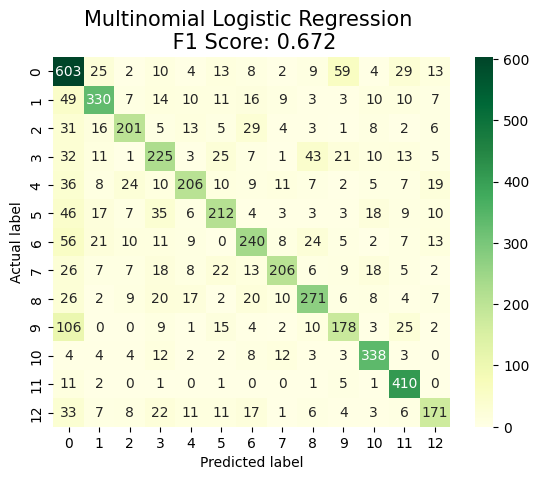

In [30]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_true=y_tt, y_pred=y_pred_1)), annot=True, cmap="YlGn", fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Multinomial Logistic Regression \n F1 Score: {0}'.format(round(score,3))
plt.title(all_sample_title, size = 15)

In [9]:
cv_results_2 = pd.read_csv('CV_Results_LG.csv', index_col=None)

In [11]:
cv_results_2 = (cv_results_2.iloc[:,1:])

In [12]:
cv_results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,76.146165,19.307997,0.082949,0.059504,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.625718,0.616511,0.628952,...,0.620450,0.005732,7,0.626143,0.627079,0.624693,0.626461,0.626947,0.626264,0.000855
1,221.045458,48.067701,0.139404,0.014551,0.010,l2,"{'C': 0.01, 'penalty': 'l2'}",0.662855,0.651709,0.659599,...,0.656082,0.004406,2,0.671485,0.673316,0.672012,0.674695,0.673065,0.672915,0.001115
2,458.751398,52.481346,0.131429,0.008374,0.100,l2,"{'C': 0.1, 'penalty': 'l2'}",0.669019,0.655454,0.663020,...,0.660998,0.004816,1,0.696890,0.699467,0.695956,0.699675,0.696830,0.697764,0.001514
3,782.039480,137.129888,0.140560,0.006201,1.000,l2,"{'C': 1, 'penalty': 'l2'}",0.658261,0.643573,0.653730,...,0.650830,0.005039,3,0.707086,0.711299,0.706835,0.708926,0.706459,0.708121,0.001802
4,750.570482,119.636313,0.120405,0.018511,10.000,l2,"{'C': 10, 'penalty': 'l2'}",0.653712,0.636504,0.648951,...,0.644396,0.006328,4,0.711141,0.713975,0.711732,0.712933,0.709795,0.711915,0.001443
5,1083.225538,132.692603,0.191821,0.077343,100.000,l2,"{'C': 100, 'penalty': 'l2'}",0.649117,0.633955,0.645172,...,0.641529,0.005594,5,0.712548,0.715170,0.713217,0.714672,0.711277,0.713377,0.001415
6,1193.798421,44.533168,0.196148,0.029157,1000.000,l2,"{'C': 1000, 'penalty': 'l2'}",0.648435,0.632663,0.646217,...,0.640840,0.006186,6,0.712646,0.714888,0.713382,0.714756,0.711239,0.713382,0.001363


In [13]:
cv_results_2["param_C"]

0       0.001
1       0.010
2       0.100
3       1.000
4      10.000
5     100.000
6    1000.000
Name: param_C, dtype: float64

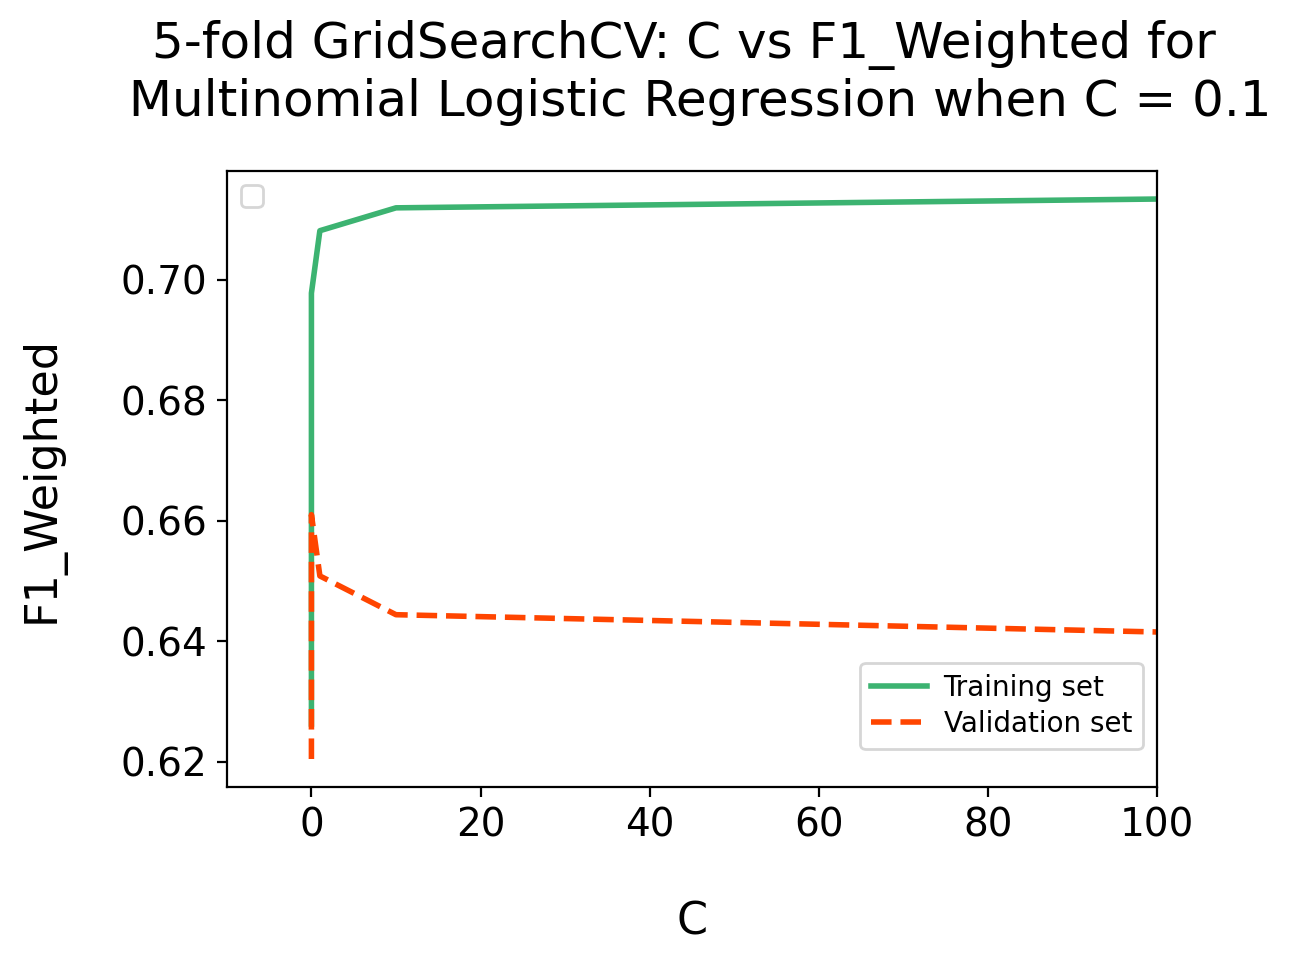

In [16]:
plt.figure(figsize=(6,4), dpi=200)
cv_results_2['param_C'] = cv_results_2['param_C'].astype('int')
acc = cv_results_2["mean_train_score"]
val_acc = cv_results_2["mean_test_score"]



epochs = range(len(acc))
plt.plot(cv_results_2["param_C"], acc, label='Training set', color='mediumseagreen', linestyle='-', lw=2)
plt.plot(cv_results_2["param_C"], val_acc, label='Validation set', color='orangered', linestyle='--', lw=2)
plt.title('5-fold GridSearchCV: C vs F1_Weighted for \n Multinomial Logistic Regression when C = 0.1', fontsize=18, pad=20)
plt.legend([])



plt.xlabel('C', fontsize=16, labelpad=20)
plt.ylabel('F1_Weighted', fontsize=16, labelpad=20)
plt.xlim([-10,100])
plt.tick_params(labelsize=14)



plt.figlegend(loc='lower right', ncol=1, labelspacing=0.3,
              title_fontsize=12, fontsize=10, bbox_to_anchor=(0.9, 0.14),
              handletextpad=0.6, frameon=True)
plt.show()